In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import libem
import numpy as np
from libvis import Visualizations
import matplotlib.pyplot as plt

from components import *

In [40]:
sim = libem.EMSimulationSpace3D(space_size=(2, 2, 2), top_left=(-1, -1, -1), scale=30)
VOLT = 10
sim.compute(make_enforcer(
    enf(EMObjects.rectangular_prism_solid, (-0.8, -0.8, -0.8), (1.6, 0.1, 1.6), -VOLT),
    enf(EMObjects.rectangular_prism_solid, (-0.8, 0.8, -0.8), (1.6, 0.1, 1.6), VOLT)
))
sim.get_efield()
print("Done.")

Computed in 2108 iterations.
Done.


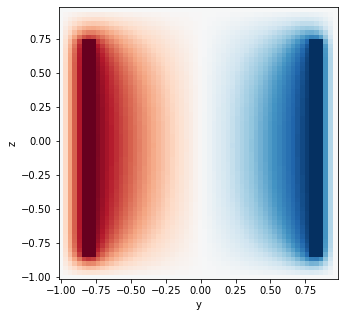

In [41]:
Visualizations.colormesh_2d(libem.EMSimulationSpace2D.from_3d(sim), size=(5, 5))

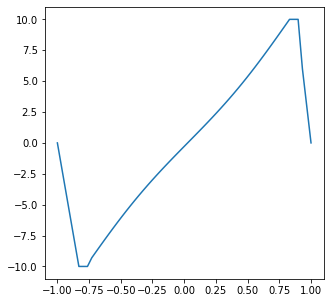

-0.10686496739502667


In [42]:
plt.figure(figsize=(5, 5))
zero = sim.global_unit_to_point((0, 0, 0))
yrange = np.linspace(-1, 1, sim.V.shape[1])
plt.plot(yrange, sim.V[zero[0],:,zero[2]])
plt.show()
print(sim.V[zero])

In [43]:
print(sim.E.T[sim.global_unit_to_point((0, 0.25, 0.25))])
print(sim.V[sim.global_unit_to_point((0, 0.25, 0.25))])

[ 0.01510671 -0.1816664   0.00147119]
2.310602350730328


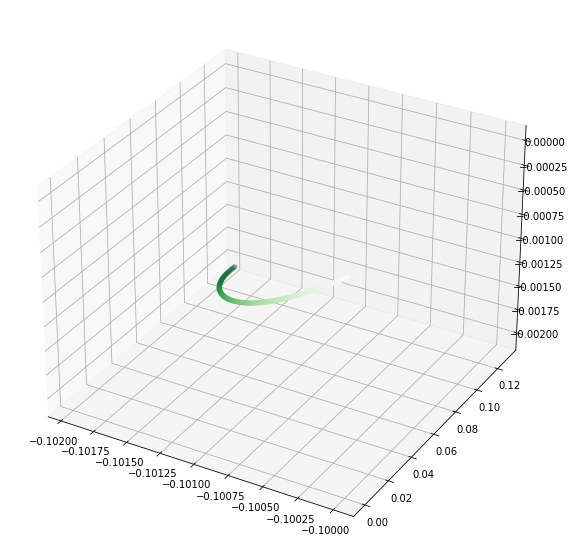

In [50]:
m1 = libem.ChargedParticle3D(sim, 0.1, -1, (-0.1, 0, 0), (0.0, 0.0, 0.0))
trange = np.linspace(0, 2, 100)
m1.compute_motion(trange)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

#Visualizations.colormesh_3d(sim, size=(8, 8), resolution=1, color_norm=1, graph_ax=ax)
Visualizations.trajectory_3d(m1.time, m1.position, graph_ax=ax)

plt.show()